In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the heart disease dataset
url = "heart-disease-data.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop(columns=['target'])  # Assuming 'target' is the column indicating heart disease presence
y = data['target']


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Univariate Selection

In [4]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest
selector = SelectKBest(score_func=chi2, k='all')  # You can adjust 'k' based on the number of features you want
X_new = selector.fit_transform(X, y) 




In [5]:
# Get scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for scores
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
 
# Sort the features by score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

     Feature       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


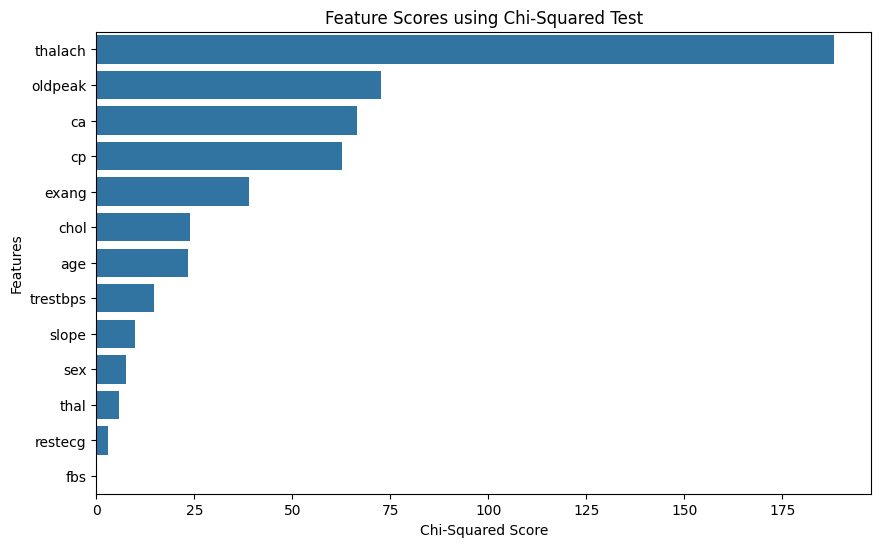

In [8]:
# Plotting feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores using Chi-Squared Test')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Features')
plt.show()


In [12]:
# Define a threshold
threshold = 15  # Adjust this value based on your preference
selected_features = feature_scores[feature_scores['Score'] > threshold]

print("Selected Features based on Chi-Squared Score:")
print(selected_features)


Selected Features based on Chi-Squared Score:
    Feature       Score
7   thalach  188.320472
9   oldpeak   72.644253
11       ca   66.440765
2        cp   62.598098
8     exang   38.914377
4      chol   23.936394
0       age   23.286624


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [14]:
model = RandomForestClassifier()

In [15]:
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust 'n_features_to_select' as needed
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)

Selected Features by RFE:
Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [17]:
# Load the heart disease dataset
url = "heart-disease-data.csv"
data = pd.read_csv(url)

# Separate features and target variable
X = data.drop(columns=['target'])  # 'target' is the column indicating heart disease presence
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the Random Forest model and set the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # You can adjust the number of features as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


Selected Features by RFE:
Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


In [19]:
# Transform the training and test sets to keep only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Accuracy Score: 0.7912087912087912
